## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Extracción de reglas de pertenencia a grupos

##### Árboles de Decisión

---

En esta libreta se toman los resultados de la clusterización para realizar la extracción de reglas que permitan comprender de qué manera fueron conformados los grupos. 

---

### Carga de librerias a utilizar

In [1]:
# Se importan las librerias a utilizar
import pandas as pd

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

# Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Importación para la exportación a texto de las reglas del árbol
from sklearn.tree import export_text

# Para la visualización de los resultados
import matplotlib.pyplot as plt

### Lectura del dataset generado previamente

In [2]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../../data/final/df_kms_k2.csv', sep=';') 
datos.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,cluster
0,21.0,1000.0,2.0,5.0,9600.0,0.10,11.14,0.0,39.0,1144.0,...,False,False,True,False,False,False,True,False,False,0
1,23.0,35000.0,2.0,4.0,65500.0,0.53,15.23,1.0,36.0,1887.0,...,False,False,True,False,False,False,False,True,False,0
2,24.0,35000.0,4.0,8.0,54400.0,0.55,14.27,1.0,54.0,1314.0,...,False,False,True,True,False,False,False,False,False,0
3,21.0,2500.0,2.0,2.0,9900.0,0.25,7.14,1.0,34.0,1171.0,...,False,True,False,False,False,False,True,False,False,0
4,26.0,35000.0,3.0,8.0,77100.0,0.45,12.42,1.0,21.0,816.0,...,False,False,True,False,False,False,False,False,True,0


### Armado de los sets de entrenamiento y testeo

In [3]:
# Se separan los atributos de datos de los de la etiqueta del dataset

# Ensure the 'cluster' column exists in the DataFrame
if 'cluster' in datos.columns:
    labels = datos['cluster'].astype('str')  # Convert to string
else:
    raise KeyError("The 'cluster' column is missing in the DataFrame.")

features = datos[['edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'pct_ingreso', 'tasa_interes',
       'estado_credito', 'antiguedad_cliente', 'gastos_ult_12m',
       'limite_credito_tc', 'operaciones_ult_12m', 'personas_a_cargo',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO',
       'estado_civil_DESCONOCIDO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTERO', 'estado_cliente_ACTIVO',
       'estado_cliente_PASIVO', 'genero_F', 'genero_M',
       'nivel_educativo_DESCONOCIDO', 'nivel_educativo_POSGRADO_COMPLETO',
       'nivel_educativo_POSGRADO_INCOMPLETO',
       'nivel_educativo_SECUNDARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_INCOMPLETO']] 

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: cluster, dtype: object
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,21.0,1000.0,2.0,5.0,9600.0,0.10,11.14,0.0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
1,23.0,35000.0,2.0,4.0,65500.0,0.53,15.23,1.0,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
2,24.0,35000.0,4.0,8.0,54400.0,0.55,14.27,1.0,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False
3,21.0,2500.0,2.0,2.0,9900.0,0.25,7.14,1.0,34.0,1171.0,...,True,False,True,False,False,False,False,True,False,False
4,26.0,35000.0,3.0,8.0,77100.0,0.45,12.42,1.0,21.0,816.0,...,True,False,False,True,False,False,False,False,False,True


In [4]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,21.0,1000.0,2.0,5.0,9600.0,0.10,11.14,0.0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
1,23.0,35000.0,2.0,4.0,65500.0,0.53,15.23,1.0,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
2,24.0,35000.0,4.0,8.0,54400.0,0.55,14.27,1.0,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False
3,21.0,2500.0,2.0,2.0,9900.0,0.25,7.14,1.0,34.0,1171.0,...,True,False,True,False,False,False,False,True,False,False
4,26.0,35000.0,3.0,8.0,77100.0,0.45,12.42,1.0,21.0,816.0,...,True,False,False,True,False,False,False,False,False,True


In [5]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [6]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[0]}")
print("-"*50)
print(f"Label del registro: \n{train_labels.iloc[0]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[0]}")
print("-"*50)
print(f"Label del registro: \n{test_labels.iloc[0]}")

Un registro de entrenamiento: 
edad                                           22.0
importe_solicitado                           8000.0
duracion_credito                                3.0
antiguedad_empleado                             2.0
ingresos                                    60000.0
pct_ingreso                                    0.13
tasa_interes                                  13.49
estado_credito                                  0.0
antiguedad_cliente                             36.0
gastos_ult_12m                               8980.0
limite_credito_tc                            8290.0
operaciones_ult_12m                            93.0
personas_a_cargo                                3.0
situacion_vivienda_ALQUILER                    True
situacion_vivienda_HIPOTECA                   False
situacion_vivienda_OTROS                      False
situacion_vivienda_PROPIA                     False
objetivo_credito_EDUCACIÓN                    False
objetivo_credito_INVERSIONES     

In [7]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()
    plt.close()

In [8]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

Se pasa a configurar la serie de experimentos en **mlflow**

In [8]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Reglas - Prueba #2 - Kmeans K=2 Sin normalizar - Optimización Hiperparámetros") 
mlflow.autolog()

2025/05/07 18:03:16 INFO mlflow.tracking.fluent: Experiment with name 'Reglas - Prueba #2 - Kmeans K=2 Sin normalizar - Optimización Hiperparámetros' does not exist. Creating a new experiment.
2025/05/07 18:03:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [9]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import mlflow
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import time

# Definimos los parámetros para RandomizedSearchCV
# Espacio de búsqueda amplio para exploración rápida
param_dist = {
    'max_depth': [None, 3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

# Empezamos con RandomizedSearchCV (más rápido, exploración amplia)
with mlflow.start_run(run_name='DTC_RandomizedSearch'):
    start_time = time.time()
    
    # Número de iteraciones limitado para no tardar demasiado
    random_search = RandomizedSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_distributions=param_dist,
        n_iter=20,  # Limitamos a 20 combinaciones aleatorias
        cv=5,
        n_jobs=-1,  # Usar todos los núcleos disponibles
        verbose=1,
        random_state=42,
        scoring='accuracy'
    )
    
    # Ajustamos el modelo
    random_search.fit(train_data, train_labels)
    
    # Tiempo total
    elapsed_time = time.time() - start_time
    
    # Registramos los resultados en MLflow
    mlflow.log_params(random_search.best_params_)
    mlflow.log_metric("best_random_cv_score", random_search.best_score_)
    mlflow.log_metric("random_search_time", elapsed_time)
    
    print(f"RandomizedSearchCV completado en {elapsed_time:.2f} segundos")
    print(f"Mejores parámetros encontrados: {random_search.best_params_}")
    print(f"Mejor puntuación CV: {random_search.best_score_:.4f}")

# Afinamos con GridSearchCV en un espacio más reducido
# Usando los mejores parámetros de RandomizedSearchCV como punto de partida
best_params = random_search.best_params_

# Construimos un espacio de búsqueda más acotado alrededor de los mejores valores
grid_params = {}
for param, value in best_params.items():
    if param == 'max_depth':
        if value is None:
            grid_params[param] = [None, 15, 20]
        else:
            grid_params[param] = [max(1, value-2), value, value+2]
    elif param == 'min_samples_split':
        grid_params[param] = [max(2, value-2), value, min(30, value+2)]
    elif param == 'min_samples_leaf':
        grid_params[param] = [max(1, value-1), value, min(10, value+1)]
    elif param == 'criterion':
        grid_params[param] = ['gini', 'entropy']
    elif param == 'max_features':
        if value is None:
            grid_params[param] = [None, 'sqrt']
        elif value == 'sqrt':
            grid_params[param] = ['sqrt', 'log2']
        else:
            grid_params[param] = ['log2', None]

# GridSearchCV para una búsqueda exhaustiva pero acotada
with mlflow.start_run(run_name='DTC_GridSearch'):
    start_time = time.time()
    
    grid_search = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid=grid_params,
        cv=5,
        n_jobs=-1,
        verbose=1,
        scoring='accuracy'
    )
    
    # Ajustamos el modelo
    grid_search.fit(train_data, train_labels)
    
    # Tiempo total
    elapsed_time = time.time() - start_time
    
    # Registramos los resultados en MLflow
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("best_grid_cv_score", grid_search.best_score_)
    mlflow.log_metric("grid_search_time", elapsed_time)
    
    print(f"GridSearchCV completado en {elapsed_time:.2f} segundos")
    print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
    print(f"Mejor puntuación CV: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/05/07 18:04:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/05/07 18:04:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/05/07 18:04:39 INFO mlflow.sklearn.utils: Logging the 5 best runs, 15 runs will be omitted.


RandomizedSearchCV completado en 34.38 segundos
Mejores parámetros encontrados: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7, 'criterion': 'gini'}
Mejor puntuación CV: 0.9991
Fitting 5 folds for each of 108 candidates, totalling 540 fits


2025/05/07 18:04:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/05/07 18:05:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/05/07 18:05:06 INFO mlflow.sklearn.utils: Logging the 5 best runs, 103 runs will be omitted.


GridSearchCV completado en 26.10 segundos
Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mejor puntuación CV: 0.9991


#### Árboles de Decisión (TDIDT)

In [12]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)

    dtc.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

2025/05/07 18:09:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


In [16]:
dtc

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [20]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Rendimiento obtenido: 0.9995495495495496
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2072
           1       0.99      1.00      1.00       148

    accuracy                           1.00      2220
   macro avg       1.00      1.00      1.00      2220
weighted avg       1.00      1.00      1.00      2220

Matriz de confusión:


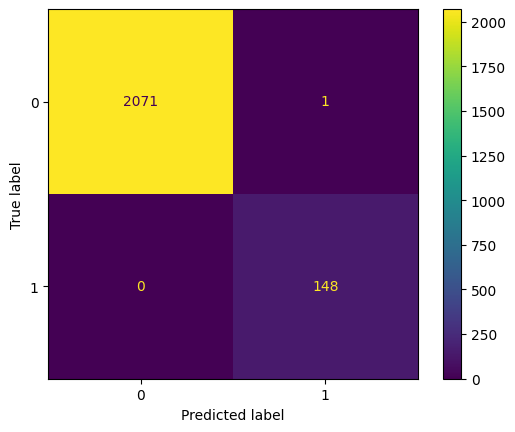

In [17]:
evaluar_modelo(dtc, test_data, test_labels)

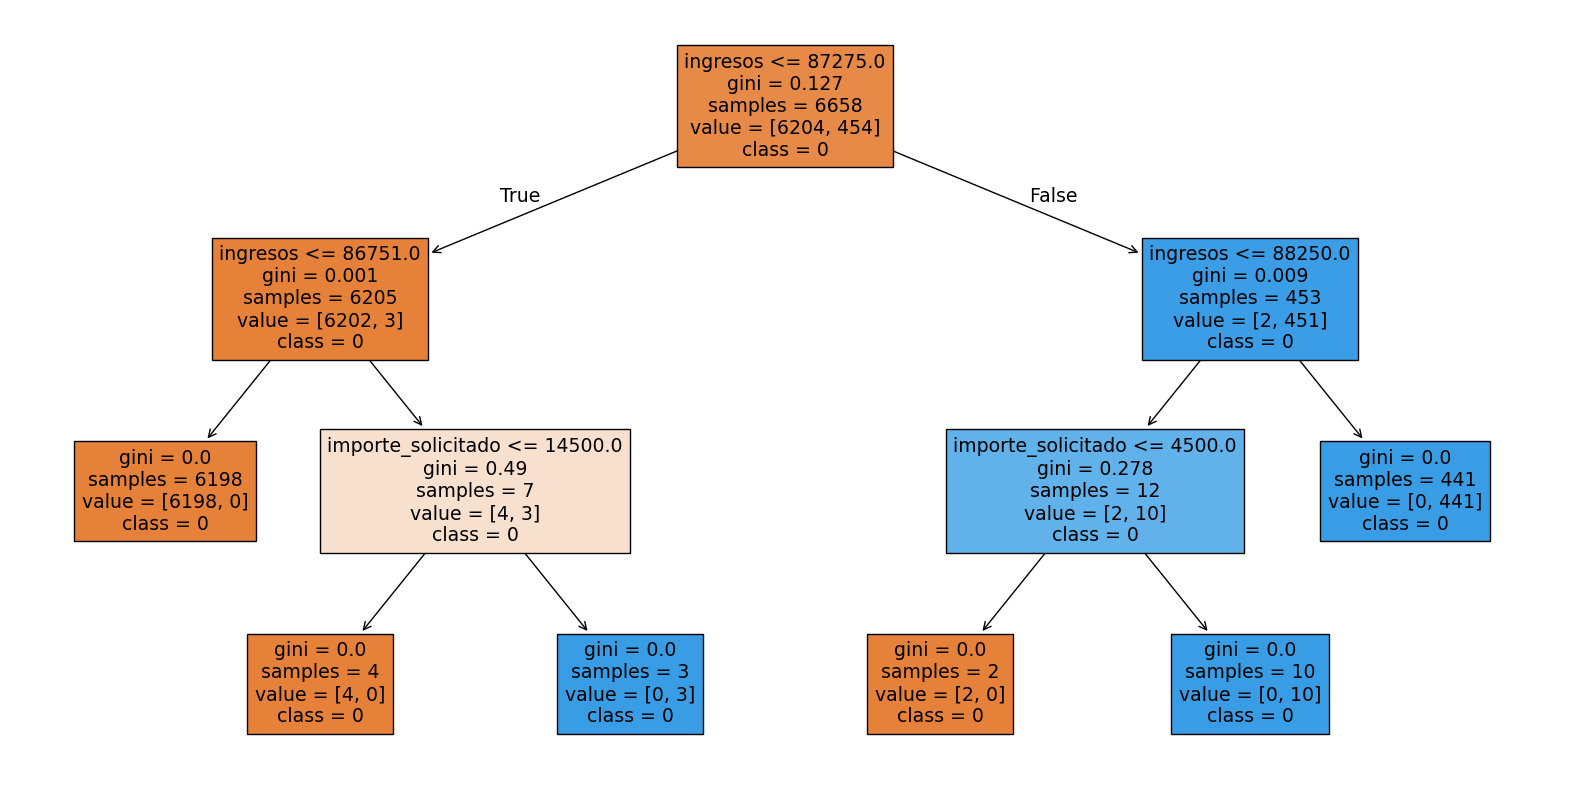

In [18]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

In [19]:
# Exportar las reglas del árbol
rules = export_text(dtc, feature_names=list(data.columns))
print(rules)

|--- ingresos <= 87275.00
|   |--- ingresos <= 86751.00
|   |   |--- class: 0
|   |--- ingresos >  86751.00
|   |   |--- importe_solicitado <= 14500.00
|   |   |   |--- class: 0
|   |   |--- importe_solicitado >  14500.00
|   |   |   |--- class: 1
|--- ingresos >  87275.00
|   |--- ingresos <= 88250.00
|   |   |--- importe_solicitado <= 4500.00
|   |   |   |--- class: 0
|   |   |--- importe_solicitado >  4500.00
|   |   |   |--- class: 1
|   |--- ingresos >  88250.00
|   |   |--- class: 1

